In [6]:
##import all our useful packages

import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

from minepy import MINE
from scipy.spatial import distance
import math

import csv
from pandas import read_csv

In [17]:
df = pd.read_csv('magneticmoment_Ef_data.csv', header=0)
mine = MINE(alpha=0.6, c=15) 
print("num columns = ", len(df.columns))

num columns =  83


In [56]:
y_axis = "magnetic_moment"



MIC_corrs = []

for j in range(len(df.columns)):
   if(isinstance(df.iloc[0][j], np.float64) or isinstance(df.iloc[0][j], np.int64)):
        
        #print(df.iloc[:,j])
        mine.compute_score(df.iloc[:,j],df[y_axis]) 
        tmp_corr = mine.mic() 

        colname = df.columns[j]
        
        MIC_corrs.append((colname, tmp_corr))

corrdf = pd.DataFrame.from_records(MIC_corrs[1:], columns=['feature', 'correlation'])


corrdf = corrdf.dropna()

corrdf = corrdf.sort_values(by=['correlation'])

display(corrdf)


<ipython-input-56-1cc50d65f2d5>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(df.iloc[:,j],df[y_axis])


,feature,correlation
54,cmpd_skew_f,0.000000
6,num_f,0.000000
58,frac_f,0.000000
57,cmpd_sigma_f,0.000000
34,numelectron_std,0.202412
...,...,...
65,Nup_mean,0.598304
49,nvalence_std,0.628053
50,nvalence_avg,0.631397
53,cmpd_skew_d,0.764636


In [62]:
display(corrdf.iloc[-12:-1])

,feature,correlation
21,covalentrad_max_dif,0.412775
48,nvalence_std_dif,0.484723
47,nvalence_sum_dif,0.494933
25,dipole_avg,0.539651
51,nvalence_max_dif,0.551342
5,num_d,0.554245
56,cmpd_sigma_d,0.559062
65,Nup_mean,0.598304
49,nvalence_std,0.628053
50,nvalence_avg,0.631397


In [122]:
features = ["Nup_mean", "cs_bob",  "nvalence_max_dif", "dipole_avg", "Nup_var", "nvalence_std", 
            "nvalence_avg", "dipole_std_dif",  "vdwradius_avg", "covalentrad_std_dif", "dipole_max_dif", "hardness_mean" ]
tmpdf = corrdf.loc[corrdf['feature'] == features[0]]
for i in range(1,len(features)):
    tmpdf = pd.concat( (tmpdf, corrdf.loc[corrdf['feature'] == features[i]]) )

display(tmpdf)

,feature,correlation
65,Nup_mean,0.598304
67,cs_bob,0.317229
51,nvalence_max_dif,0.551342
25,dipole_avg,0.539651
66,Nup_var,0.335932
49,nvalence_std,0.628053
50,nvalence_avg,0.631397
23,dipole_std_dif,0.292529
40,vdwradius_avg,0.266540
18,covalentrad_std_dif,0.274642


covalentrad_max_dif 0.4127749105135048
nvalence_std_dif 0.4847228219933096
nvalence_sum_dif 0.4949328358185925
dipole_avg 0.5396510146018656
nvalence_max_dif 0.5513417811780209
num_d 0.5542447364259391
cmpd_sigma_d 0.5590616093866941
Nup_mean 0.5983037419168354
nvalence_std 0.6280532489829691
nvalence_avg 0.6313969656185986
cmpd_skew_d 0.7646357901812696
magnetic_moment 1.0000000000000002


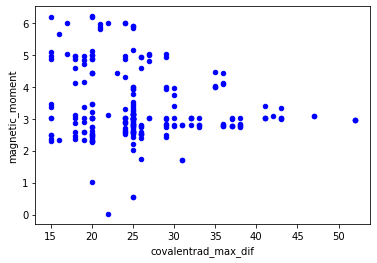

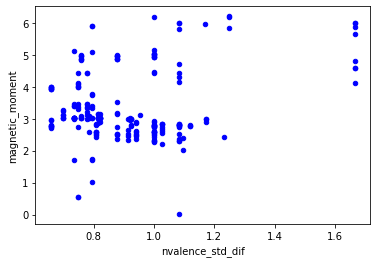

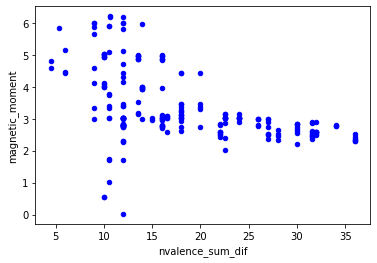

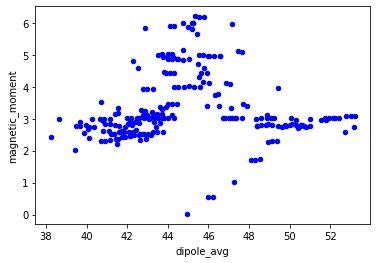

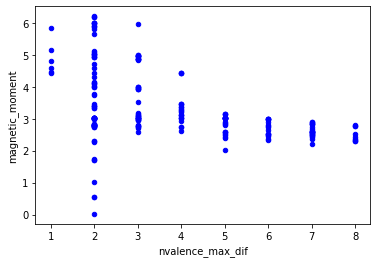

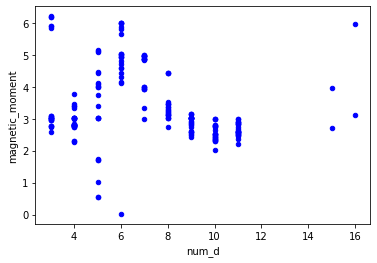

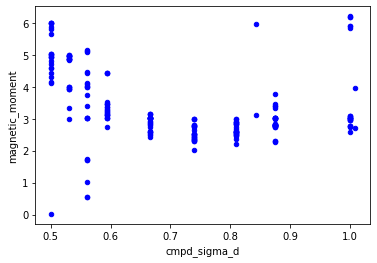

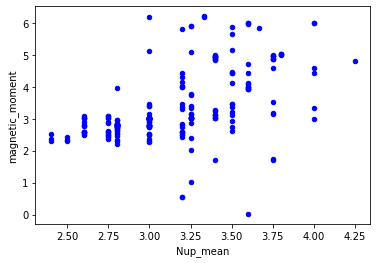

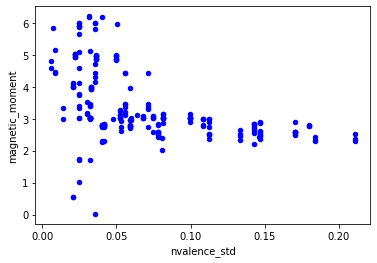

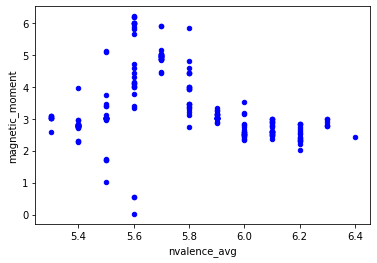

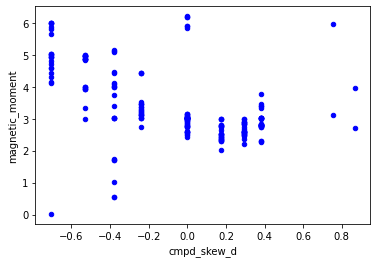

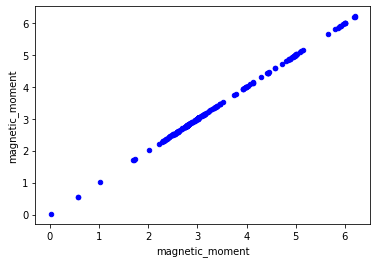

In [53]:
n = 12
for i in range(len(corrdf)-n, len(corrdf)):
    print(corrdf.iloc[i].feature, corrdf.iloc[i].correlation)
    
for i in range(len(corrdf)-n, len(corrdf)):
    name = corrdf.iloc[i].feature
    ax1 = df.plot.scatter(x=name, y=feature2, c='Blue')

In [91]:
features = ["Nup_mean", "cs_bob",  "nvalence_max_dif", "dipole_avg", "Nup_var", "nvalence_std", 
            "nvalence_avg", "dipole_std_dif",  "vdwradius_avg", "covalentrad_std_dif", "dipole_max_dif", "hardness_mean" ]

feature2 = "magnetic_moment"

for i in features:
    tmp = corrdf.loc[corrdf['feature'] == i]
    print(tmp.correlation)

# for i in features:
#     ax1 = cdf.plot.scatter(x=i, y=feature2, c='Blue')


65    0.598304
Name: correlation, dtype: float64
67    0.317229
Name: correlation, dtype: float64
51    0.551342
Name: correlation, dtype: float64
25    0.539651
Name: correlation, dtype: float64
66    0.335932
Name: correlation, dtype: float64
49    0.628053
Name: correlation, dtype: float64
50    0.631397
Name: correlation, dtype: float64
23    0.292529
Name: correlation, dtype: float64
40    0.26654
Name: correlation, dtype: float64
18    0.274642
Name: correlation, dtype: float64
26    0.367349
Name: correlation, dtype: float64
63    0.267534
Name: correlation, dtype: float64
